### Python Plotting Tutorial w/ Matplotlib & Pandas (Line Graph, Histogram, Pie Chart, Box & Whiskers)
Website: https://www.youtube.com/watch?v=0P7QnIQDBJY

### Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [2]:
gas = pd.read_csv('gas_prices.csv')
gas.head()
#gas.shape
#fifa.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


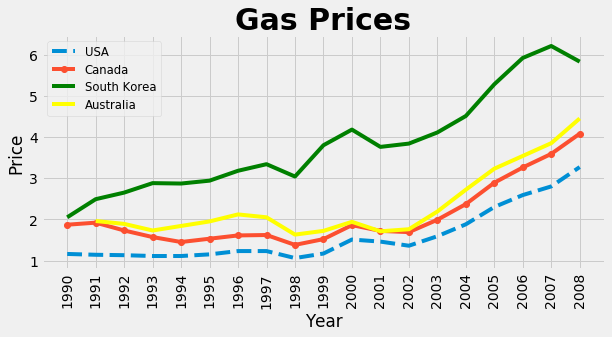

In [3]:
# Manually plotting some countries
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,4))

plt.plot(gas.Year, gas.USA, linestyle = '--', label = 'USA')
plt.plot(gas.Year, gas.Canada, linestyle = '-', marker = 'o', label = 'Canada')
plt.plot(gas.Year, gas['South Korea'], color = 'green', label = 'South Korea')
plt.plot(gas.Year, gas['Australia'], color = 'yellow', label = 'Australia')


plt.title('Gas Prices', fontdict = {'fontweight': 'bold', 'fontsize': 30})
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas.Year, rotation = 'vertical')

# Otherwise if we want to see the years horizontally but not all of them we can 
# choose to see some of the years
#plt.xticks(gas.Year[::3])


plt.legend(loc = 'upper left', fontsize = 'small')

plt.savefig('Gas_price.png')

plt.show()

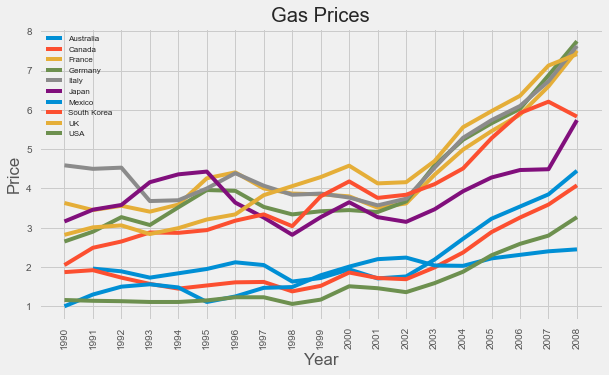

In [131]:
# Adding all countries in a graph 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,5))

for country in gas.iloc[:,1:]:
    plt.plot(gas.Year, gas[country])

plt.title('Gas Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas.Year, rotation = 'vertical')

label = gas.columns[1:]
#label = ['Australia','Canada','France', 'Germany','Italy','Japan','Mexico',
#        'South Korea','UK','USA']

plt.legend(labels = label,loc = 'best', fontsize = 8)
plt.show()

### FIFA DATA

In [7]:
fifa = pd.read_csv('fifa_data.csv')
fifa.shape

(18207, 89)

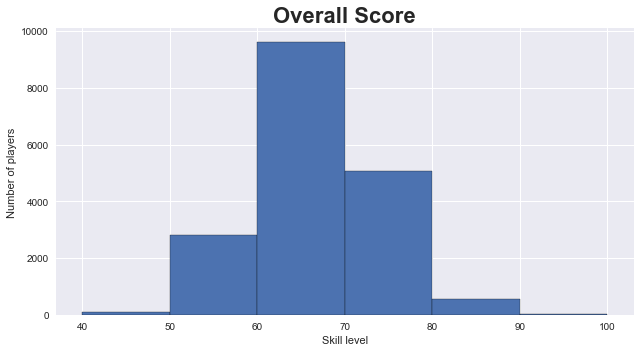

In [102]:
plt.style.use('seaborn')
plt.figure(figsize = (9,5))

bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall, bins = bins, edgecolor = 'black')

plt.title('Overall Score', fontdict={'fontweight': 'bold', 'fontsize': 22})
plt.xlabel('Skill level')
plt.ylabel('Number of players')
plt.xticks(bins)

plt.tight_layout()
plt.show()

### PIE CHARTS_1

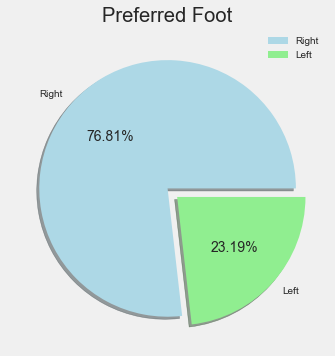

In [9]:
# Percentage of people with left and right foot
plt.style.use('fivethirtyeight')

explode = [0,0.1]
plt.pie(fifa['Preferred Foot'].value_counts(), labels = ['Right','Left'],
       colors = ['lightblue','lightgreen'], explode = explode, autopct = '%.2f%%',
       shadow=True)

plt.title('Preferred Foot')

plt.legend()
plt.show()

### PIE CHARTS_2

In [43]:
# Load fifa dataset
fifa = pd.read_csv('fifa_data.csv')
fifa.shape

(18207, 89)

In [51]:
# Drop nan values from the dataset
fifa.dropna(subset = ['Weight'], how = 'any', inplace = True)
fifa.shape

(18159, 89)

In [53]:
# From column weight I wanna keep only the numeric part
fifa['Weight'] = fifa.Weight.str[:3]
fifa.Weight

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: object

In [73]:
# Convert the column from str to int
fifa['Weight'] = fifa.Weight.astype(int)
fifa.Weight

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: int32

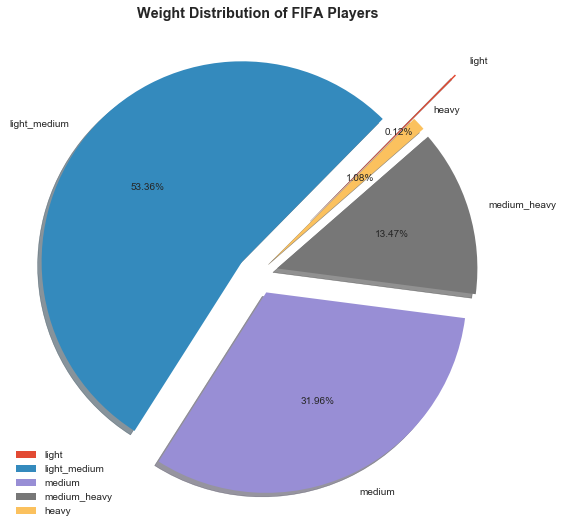

In [127]:
plt.style.use('ggplot')
plt.figure(figsize = (8,10))

# I will create a pie chart with the players' weight
# I have convert the datatype of the column Weight from str into int, so it is easy
# for me do any mathematical process
# count() --> I count how many of each group there are
# [0] --> I choose the first result 

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight)<150].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

x = [light, light_medium, medium, medium_heavy, heavy]
explode = [0.4,0.1,0.1,0.1,0.1]
labels = ['light', 'light_medium', 'medium', 'medium_heavy', 'heavy']

plt.pie(x, explode = explode, labels = labels, autopct = '%.2f%%', shadow = True,
       startangle = 45)

plt.title('Weight Distribution of FIFA Players', fontdict={'fontweight': 'bold'})
plt.legend(loc = 'best')
plt.show()

### BOXPLOT

In [155]:
# We want to compare how good two teams are.
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
real_madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
olympiacos = fifa.loc[fifa.Club == 'Olympiacos CFP']['Overall']

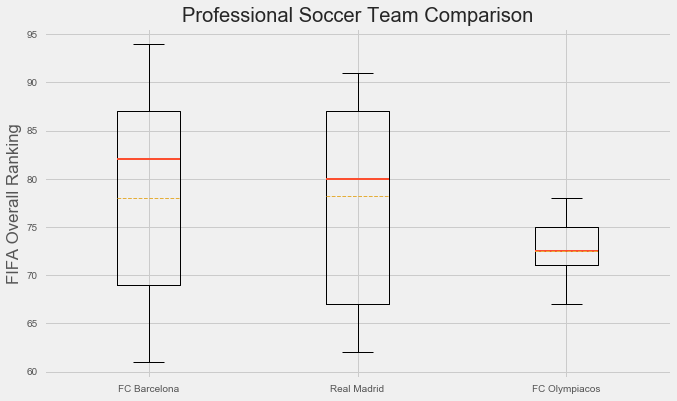

In [181]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))

labels = ['FC Barcelona', 'Real Madrid', 'FC Olympiacos']
plt.boxplot([barcelona, real_madrid, olympiacos], vert=True, labels = labels,
           medianprops={'linewidth': 2}, notch=False, showmeans=True, meanline=True,
           showbox=True)


plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Ranking')

plt.show()